In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#Loading of libraries and exploring the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/HeartDiseasePrediction_AI_SDG3/data/HeartDiseaseTrain-Test.csv')

# Basic info about data types and missing values
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Check class distribution (0 = no disease, 1 = disease)
df['target'].value_counts()


# Display first 5 rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


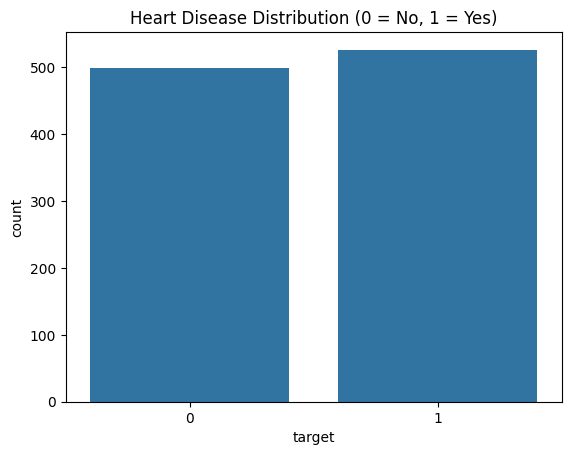

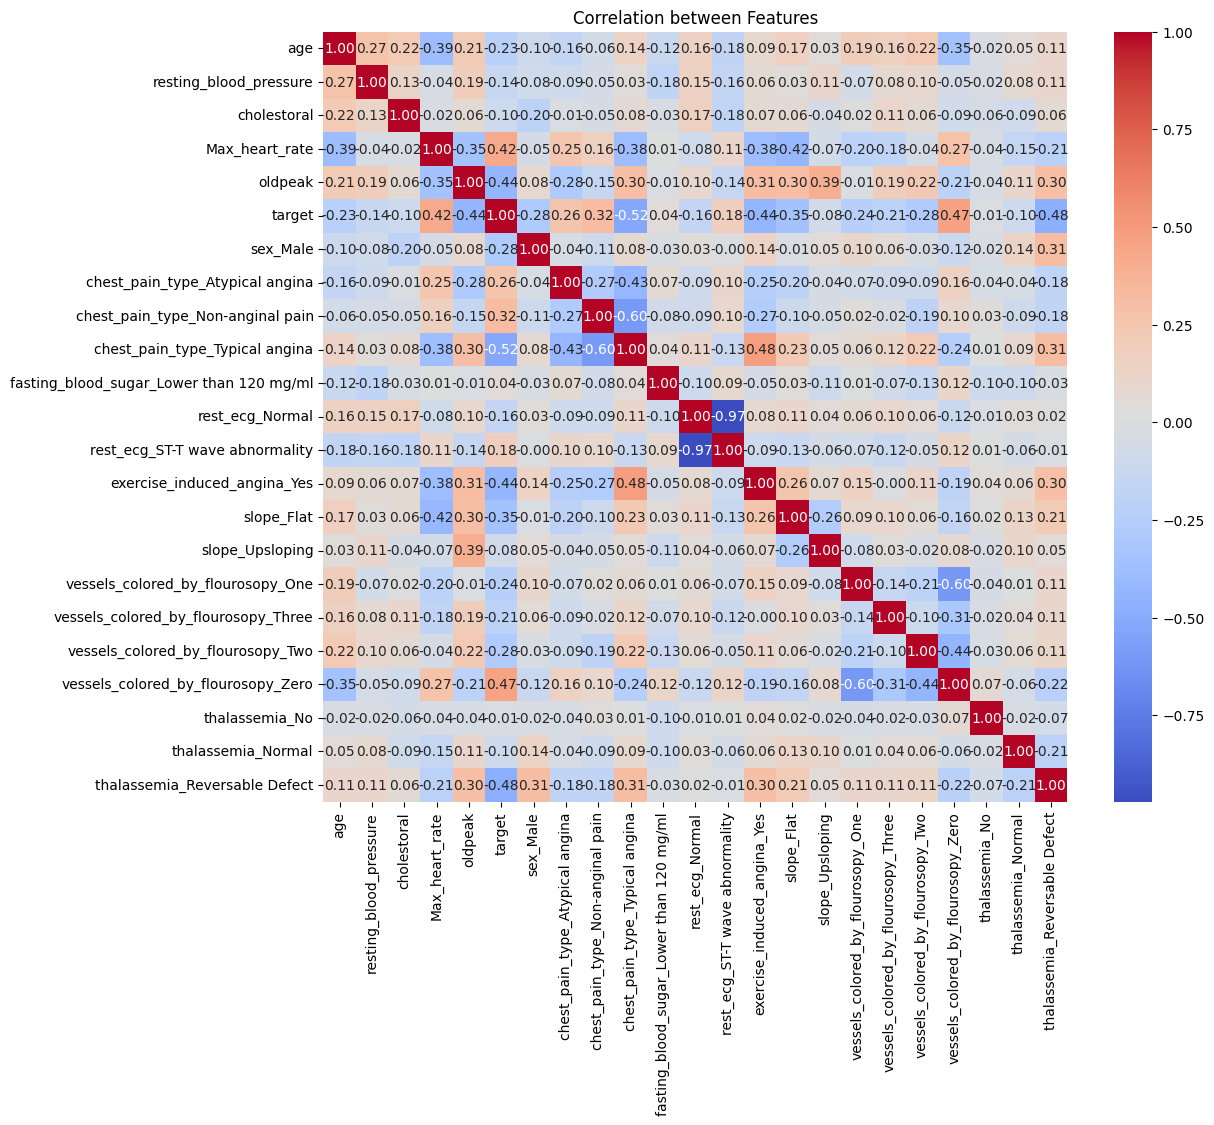

In [6]:
# Visulaizing the data for understanding and preparing data for Modeling (Preprocessing)

# Plot distribution of target variable
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')
plt.show()

# One-hot encode categorical features
# Identify categorical columns (excluding the target variable)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude the target variable if it's mistakenly included
if 'target' in categorical_cols:
    categorical_cols.remove('target')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Correlation heatmap
plt.figure(figsize=(12, 10)) # Increased figure size for better readability
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f") # Added fmt to format annotations
plt.title('Correlation between Features')
plt.show()

# Separate features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

✅ Accuracy: 0.7951219512195122

📊 Confusion Matrix:
 [[76 26]
 [16 87]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.78       102
           1       0.77      0.84      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



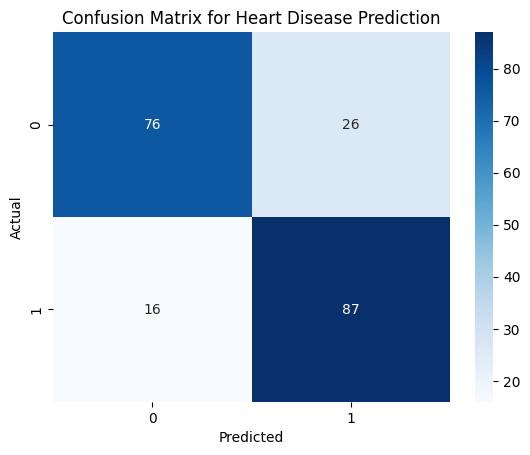

In [7]:
# Building a Machine Learning Model

# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluating the model
# Evaluate performance
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Heart Disease Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



✅ Random Forest Accuracy: 0.9853658536585366

📊 Random Forest Confusion Matrix:
 [[102   0]
 [  3 100]]

📈 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Text(50.722222222222214, 0.5, 'Actual')

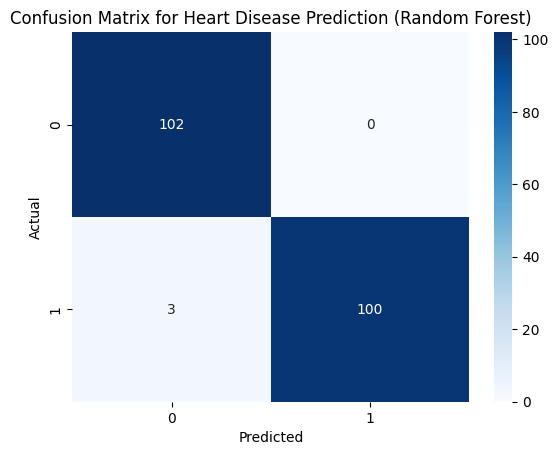

In [8]:
# Try Another Model for Comparison

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("✅ Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\n📊 Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\n📈 Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Heart Disease Prediction (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')



Ethical Reflection:
The Random Forest model achieved an impressive accuracy of 98.5%, significantly outperforming Logistic Regression (79.5%).
This demonstrates how advanced AI models can support SDG 3 – Good Health and Well-Being by enabling early detection of heart disease, potentially saving lives through data-driven prevention.

However, high accuracy does not always guarantee fairness or reliability. If the dataset underrepresents certain groups (for example, women, older adults, or specific ethnic backgrounds), the model might produce biased predictions.

Additionally, medical decisions should never rely solely on AI models — they should serve as decision-support tools for healthcare professionals.

Future improvements should include:

Evaluating model fairness across gender/age groups.

Using more diverse and recent datasets.

Ensuring data privacy and compliance with ethical standards.

This project demonstrates how responsible use of AI can make healthcare more preventive, inclusive, and data-informed, aligning with the global mission of reducing mortality from non-communicable diseases (SDG 3.4).